# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

Please type what you want to search, here, on the following line.
Mark
Results found in file a-0.png


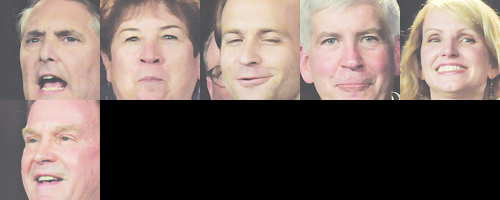

Results found in file a-1.png


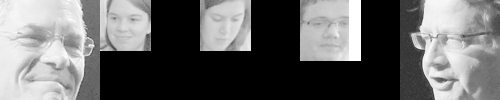

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


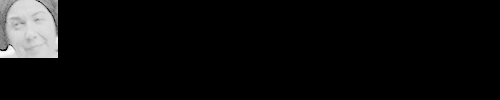

Results found in file a-2.png


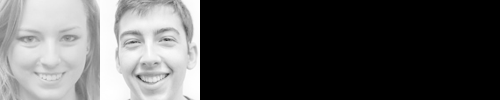

Results found in file a-3.png


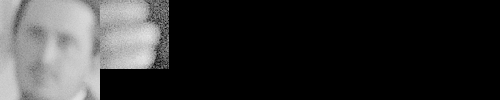

Results found in file a-8.png
But there were no faces in that file!


In [1]:
import zipfile

import PIL
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
import inspect

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!


# Type the 'keyword' to be searched here.
strng = input('Please type what you want to search, here, on the following line.\n')

# Using zipfile module to extract image files from images.zip and storing the Image objects to a list
# For our sample outputs, for 'Mark' as input we use 'images.zip' and for 'Chris' we use 'small_img.zip'!!
# Added another 'else' statement so the user can try other searches using 'images.zip'
if strng == 'Mark' :
    image_zip_file = zipfile.ZipFile('readonly/images.zip')
elif strng == 'Chris' or strng == 'Christopher' :
    image_zip_file = zipfile.ZipFile('readonly/small_img.zip')
else :
    image_zip_file = zipfile.ZipFile('readonly/images.zip')

image_files_info = image_zip_file.infolist()
images_list = []
file_names_list = []
for file_info in image_files_info :
    file_names_list.append(file_info.filename)
    file_location = image_zip_file.extract(member = file_info)
    image = Image.open(file_location)
    images_list.append(image)
    

# Now, using the pytesseract module for optical character recognition and saving the text for each image to another list
from pytesseract import image_to_string

images_text_list = []
for image in images_list:
    gray_image = image.convert('L')
    text = image_to_string(gray_image)
    images_text_list.append(text)
    
    
# Now, using the opencv module for optical face recognition and saving the bounding boxes of those faces to another list
# Changing the 'scale' and 'minNeighbors' parameters and using the values to get the desired output
img_list = []
for file_info in image_files_info:
    file_location = image_zip_file.extract(member = file_info)
    img = cv.imread(file_location)
    img_list.append(img)

bounding_boxes = []    
for image in img_list :  
    img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3,minNeighbors = 6)
    if faces == tuple(()) :
        faces = list(faces)
    else :
        faces = faces.tolist()
    bounding_boxes.append(faces)
    
    

# Now, using the bounding boxes from above to crop the faces from images and saving it another list
# The list cropped_images_list's elements are lists where each list contains cropped faces for one image
cropped_images_list = []
for idx in range(len(images_list)):
    image = images_list[idx]
    cropped_list = []
    
    if len(bounding_boxes[idx]) == 0 :
        cropped_images_list.append(cropped_list) 
    else :
        for x,y,w,h in bounding_boxes[idx]:
            cropped_image = image.crop((x,y,x+w,y+h))
            cropped_list.append(cropped_image)
        cropped_images_list.append(cropped_list) 
        
        
# Now, we paste the cropped faces from the image on a contact sheet and make a list of contact sheets
# First, resizing the cropped faces to a maximum width and height of 100 pixels each using 'thumbnail' function
contact_sheets_list = []
for cropped_image_list in cropped_images_list:
    if len(cropped_image_list) == 0:
        contact_sheets_list.append('No faces')
    else:
        for cropped_image in cropped_image_list:
                cropped_image.thumbnail((100,100))
    
        if (len(cropped_image_list)) % 5 != 0 :
            rows = ((len(cropped_image_list)) // 5) + 1
            contact_sheet = PIL.Image.new(cropped_image_list[0].mode, (100*5, 100*rows))
        else :
            rows = ((len(cropped_image_list)) // 5)
            contact_sheet = PIL.Image.new(cropped_image_list[0].mode, (100*5, 100*rows))
        x = 0
        y = 0
        for cropped_image in cropped_image_list:
            contact_sheet.paste(cropped_image, (x,y))
        
            if x+100 == contact_sheet.width:
                x=0
                y=y+100 
            else:
                x=x+100
        contact_sheets_list.append(contact_sheet)
        
        
# Finally, we search for the 'keyword' input given by user in the texts and provide output accordingly!!!!
for idx in range(len(images_text_list)):
    if strng in images_text_list[idx]:
        print('Results found in file {}'.format(file_names_list[idx]))
        if len(cropped_images_list[idx]) == 0:
            print('But there were no faces in that file!')
        else :
            display(contact_sheets_list[idx])
            